In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('car data.csv')
df.head()

In [ ]:
df.shape
df.info()
df.describe()

In [ ]:
df['Car_Name'].unique()
df['Fuel_Type'].unique()
df['Seller_Type'].unique()
df['Transmission'].unique()

In [ ]:
# Dealing with missing values
df.isnull().sum()

In [ ]:
# Restructuring the dataset
df=df.drop(columns=['Car_Name'])
df['Current Year']=2024
df['Years Old']=2024-df['Year']
df=df.drop(columns=['Current Year','Year'])
df.head()

In [ ]:
# One hot encoding for Categorical Values
df=pd.get_dummies(df,drop_first=True)
df.head()

<Axes: title={'center': 'Correlation'}>

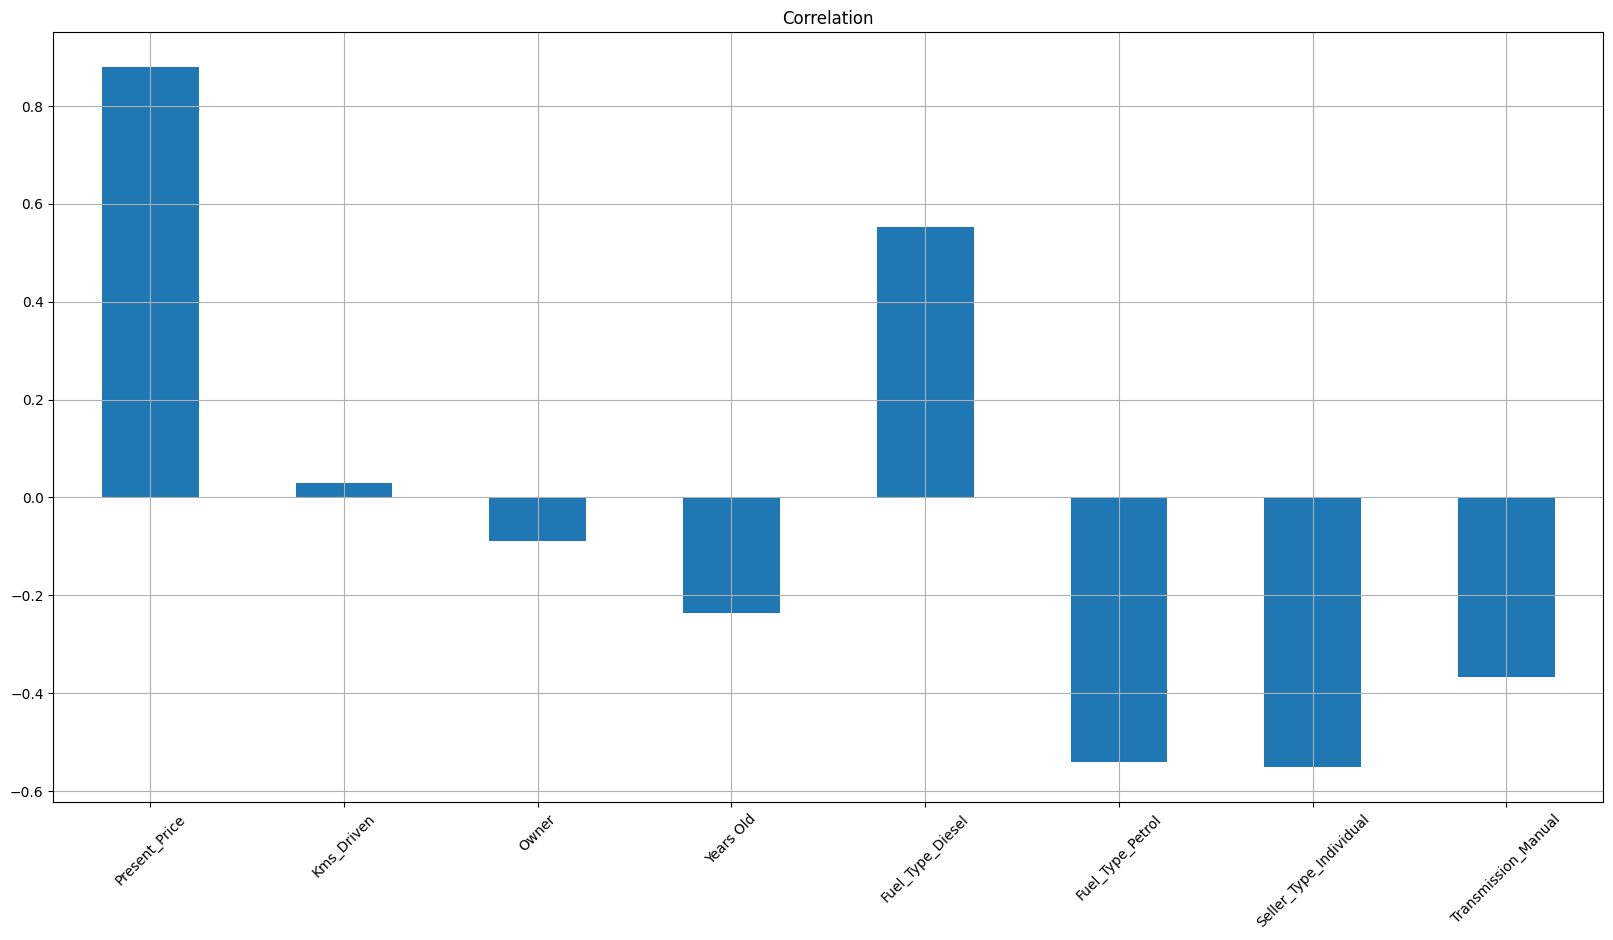

In [ ]:
# Correlation matrix
df_2=df.drop(columns=['Selling_Price'])
df_2.corrwith(df['Selling_Price']).plot.bar(
    figsize=(20,10),title='Correlation',rot=45,grid=True
)

<Axes: >

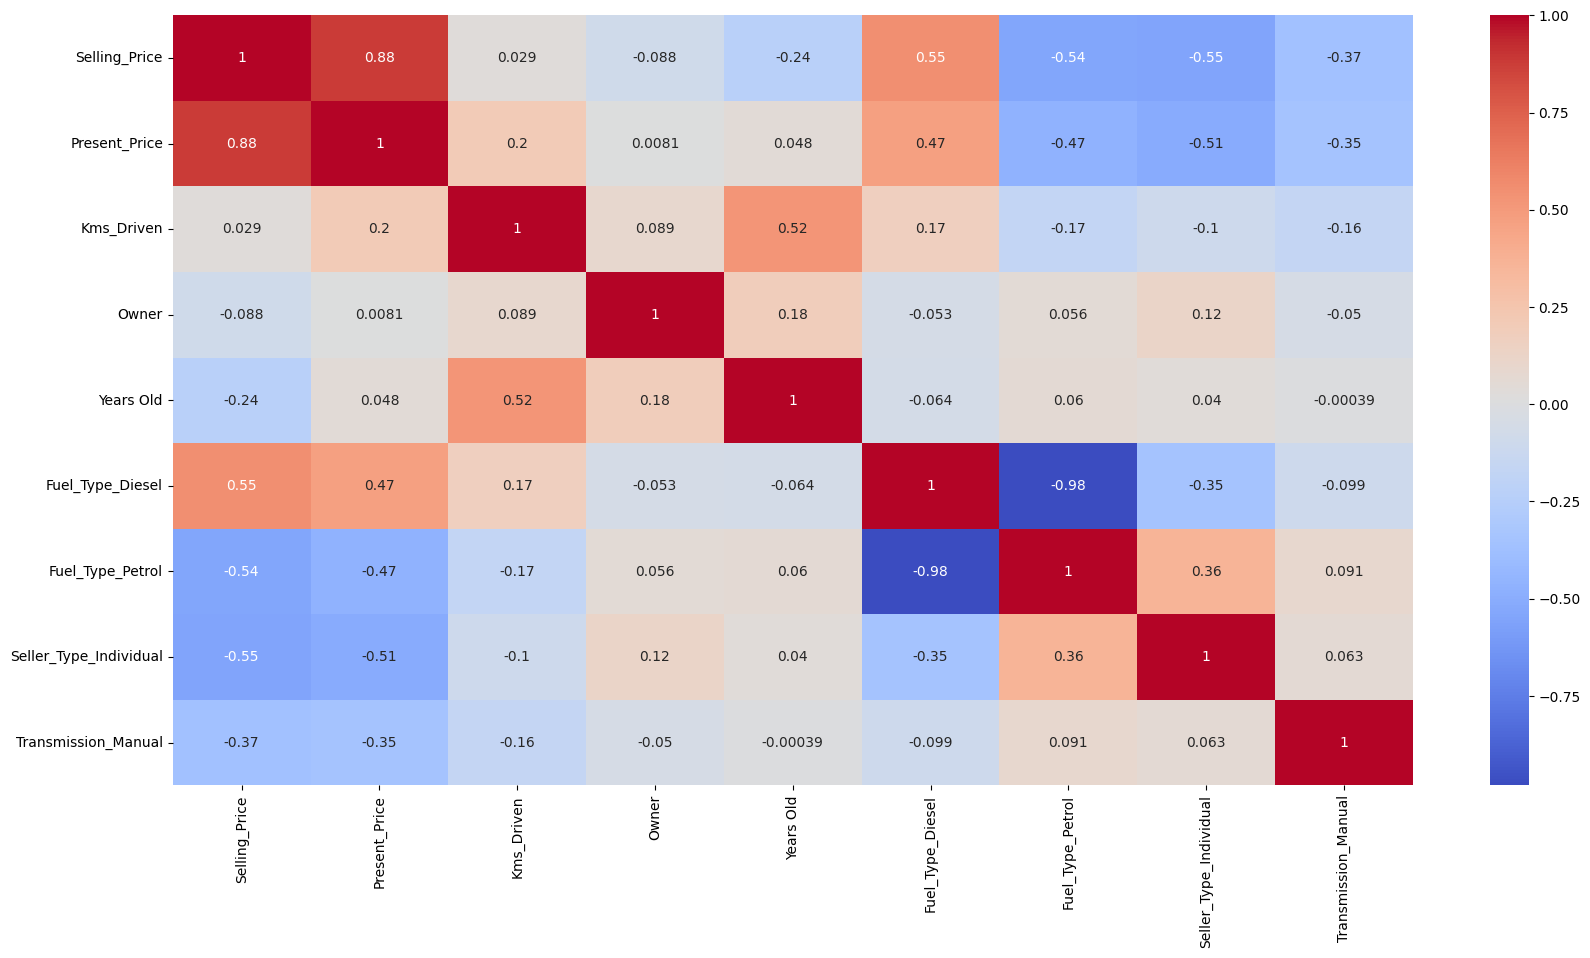

In [ ]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(columns=['Selling_Price']),df['Selling_Price'],
                                               test_size=0.2,random_state=0)

In [ ]:
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Building the model
# Method 1. Linear Regression
from sklearn.linear_model import LinearRegression
clf_1=LinearRegression()
clf_1.fit(X_train_scaled,Y_train)
y_pred1=clf_1.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score
r2_1=r2_score(Y_test,y_pred1)
r2_1

0.9144342972228512

In [ ]:
from sklearn.model_selection import cross_val_score
cv_1=cross_val_score(clf_1,X_train_scaled,Y_train,cv=10)
cv_1

array([0.77357229, 0.73829289, 0.88325289, 0.7688606 , 0.84265964,
       0.8354826 , 0.07675012, 0.88570479, 0.93328468, 0.82025043])

In [ ]:
print("Accuracy is ",np.mean(cv_1)*100,"%")
print("Standard deviation is ",np.std(cv_1)*100,"%")

Accuracy is  75.58110913793793 %
Standard deviation is  23.336018378901098 %


In [ ]:
# Method 2. Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
clf_2=RandomForestRegressor()
clf_2.fit(X_train_scaled,Y_train)
y_pred2=clf_2.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score
r2_2=r2_score(Y_test,y_pred2)
r2_2

0.9614535796128876

In [ ]:
from sklearn.model_selection import cross_val_score
cv_2=cross_val_score(clf_2,X_train_scaled,Y_train,cv=10)
cv_2

array([0.86657116, 0.95116145, 0.96677735, 0.95233971, 0.85132323,
       0.99103813, 0.77349452, 0.94641834, 0.97846372, 0.97547331])

In [ ]:
print("Accuracy is ",np.mean(cv_2)*100,"%")
print("Standard deviation is ",np.std(cv_2)*100,"%")

Accuracy is  92.53060900059076 %
Standard deviation is  6.722953253038753 %


In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
parameters={
    'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth':[10,20,30,40,50],
    'min_samples_split':[2,5,10,20,50],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
random_search=RandomizedSearchCV(estimator=clf_2,param_distributions=parameters,n_iter=5,
                                 scoring='roc_auc',n_jobs=-1,cv=5,verbose=2)
random_search.fit(X_train_scaled,Y_train)
random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomForestRegressor(criterion='friedman_mse', max_depth=40,
                      max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=5, n_estimators=700)

In [ ]:
random_search.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 40,
 'criterion': 'friedman_mse'}

In [ ]:
# Hyperparameter tuning has not worked here so we will stick with the original model

In [ ]:
# Building the final model
from sklearn.ensemble import RandomForestRegressor
clf_final=RandomForestRegressor()
clf_final.fit(X_train_scaled,Y_train)
y_pred_final=clf_final.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score
r2_final=r2_score(Y_test,y_pred_final)
r2_final

0.95586868771026

In [ ]:
# Predicting a single observation
single_obs = [[8.50, 3500, 0, 5, 1, 0, 0, 1]]
obs=scaler.transform(single_obs)
obs=pd.DataFrame(obs,columns=single_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
final_result=clf_final.predict(obs)
final_result

array([7.447])